In [194]:
# !wget -nc https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/856/original/scaler_clustering.csv -O ../temp/data/scaler_clustering.csv

In [195]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [196]:
csv_path = '../temp/data/scaler_clustering.csv'
df_raw = pd.read_csv(csv_path, index_col=0)

df_raw.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


## 1. Problem Statement & EDA
### 1.1 Problem
To cluster segment of learners at scaler on the basis of their job profile, company, and other features. Ideally, these clusters should have similar characteristics.

### 1.2 Shape of data
Import the dataset and do usual exploratory data analysis steps like checking the structure & characteristics of the dataset

#### 1.2.1 Observations on shape of data

In [197]:
df_raw.shape

(205843, 6)

#### 1.2.2 Data types of all the attributes

In [198]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205843 entries, 0 to 206922
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   company_hash      205799 non-null  object 
 1   email_hash        205843 non-null  object 
 2   orgyear           205757 non-null  float64
 3   ctc               205843 non-null  int64  
 4   job_position      153279 non-null  object 
 5   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 11.0+ MB


#### 1.2.3 Conversion of categorical attributes to 'category' (If required)

In [199]:
df_raw = df_raw.convert_dtypes()
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205843 entries, 0 to 206922
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   company_hash      205799 non-null  string
 1   email_hash        205843 non-null  string
 2   orgyear           205757 non-null  Int64 
 3   ctc               205843 non-null  Int64 
 4   job_position      153279 non-null  string
 5   ctc_updated_year  205843 non-null  Int64 
dtypes: Int64(3), string(3)
memory usage: 11.6 MB


In [200]:
pd.DataFrame({col: {'number of unique values -->':df_raw[col].nunique()} for col in df_raw.columns[2:]})

,orgyear,ctc,job_position,ctc_updated_year
number of unique values -->,77,3360,1016,7


* CTC is the only numerical variable

#### 1.2.4 Missing value detection, statistical summary.

In [201]:
df_raw.isna().sum()

company_hash           44
email_hash              0
orgyear                86
ctc                     0
job_position        52564
ctc_updated_year        0
dtype: int64

In [202]:
df_raw.describe()

,orgyear,ctc,ctc_updated_year
count,205757.0,205843.0,205843.0
mean,2014.88275,2271685.041993,2019.628231
std,63.571115,11800914.440025,1.325104
min,0.0,2.0,2015.0
25%,2013.0,530000.0,2019.0
50%,2016.0,950000.0,2020.0
75%,2018.0,1700000.0,2021.0
max,20165.0,1000150000.0,2021.0


### 1.3 Univariate Analysis

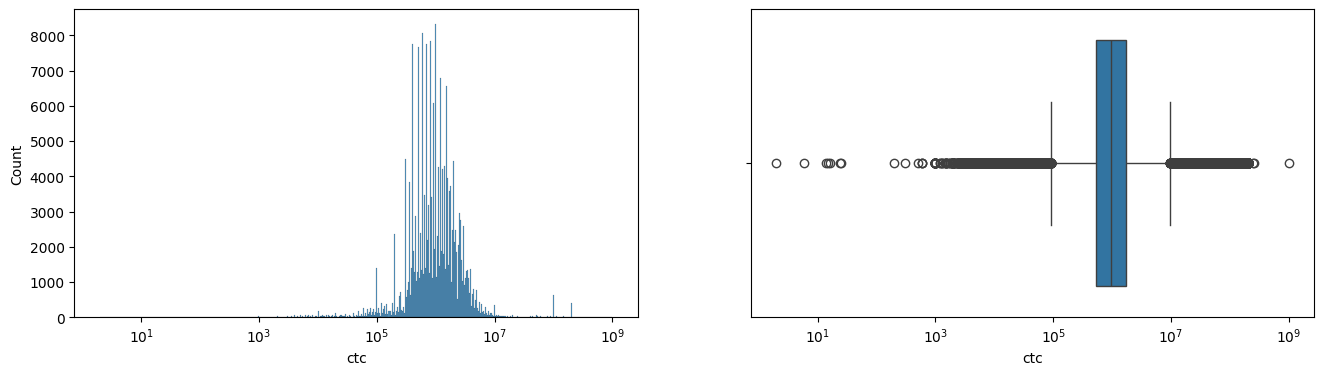

In [203]:
def distnbox(df, col):
    fig, axes = plt.subplots(1, 2, figsize=(16,4))
    sns.histplot(data=df, x=col, ax=axes[0], log_scale=True)
    sns.boxplot(data=df, x=col, ax=axes[1], log_scale=True)

distnbox(df_raw, 'ctc')

<Axes: xlabel='ctc_updated_year', ylabel='count'>

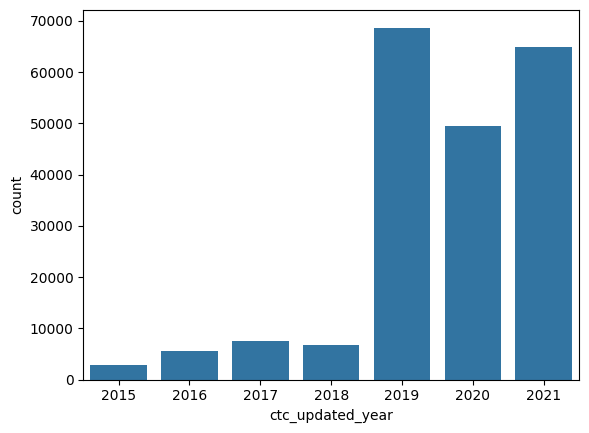

In [204]:
sns.countplot(df_raw, x='ctc_updated_year')

#### 1.3.1 Emails
Checking unique emails and frequency of occurrence of the same email hash in the data. Recording observation and inference, wherever necessary.

### 1.4 Bivariate Analysis 
Checking unique emails and frequency of occurrence of the same email hash in the data. Recording observation and inference, wherever necessary

In [205]:
df_raw[['email_hash', 'company_hash']].value_counts()

email_hash                                                        company_hash             
bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b  oxej ntwyzgrgsxto rxbxnta    10
3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94f1c88c5e15a6f31378  wgcxvb ntwyzgrgsxto           9
298528ce3160cc761e4dc37a07337ee2e0589df251d73645aae209b010210eee  cvrhtbgbtznhb                 9
6842660273f70e9aa239026ba33bfe82275d6ab0d20124021b952b5bc3d07e6c  ihvrwgbb                      9
b4d5afa09bec8689017d8b29701b80d664ca37b83cb883376b2e95191320da66  bvi ogenfvqt                  8
                                                                                               ..
000411b5d6d4e1c113bf83f1eebc0b835d77cc45bded1dc354d4b2ddf3feb189  sgowvrt sqghu xzw             1
                                                                  gutzcgj                       1
00022dc29c7f77032275182b883d4f273ea1007aefc437f8822d21c78a9cebd0  xzeqvwrgha ntwyzgrgsxto       1
                          

# 2. Data Preprocessing

## 2.1 Cleaning
### 2.1.1 Drop duplicates
Checking for duplicates in the dataset and drop them

In [206]:
# df_dropped = df_raw[~df_drop_idx].convert_dtypes()
df_dropped = df_raw.drop_duplicates()

# number of rows dropped
len(df_raw) - len(df_dropped)

34

In [207]:
# print(sum((df_dropped['orgyear']==0).dropna())) # drop 17 rows where orgyear is 0
# df_dropped = df_dropped[~(df_dropped['orgyear']==0)]

### 2.1.2 Remove special characters

In [208]:
df_stringcols = df_dropped.select_dtypes(include=pd.StringDtype())
{
    col: any(~(df_stringcols[col].str.fullmatch(r'[A-Za-z0-9 ]+').dropna())) 
    for col in df_stringcols.columns
}

{'company_hash': False, 'email_hash': False, 'job_position': True}

In [209]:
df_dropped.loc[:, 'job_position'] = df_stringcols['job_position'].str.replace(r'[A-Za-z0-9 ]+', '')

## 2.2 Imputation
Mean/ KNN Imputation, Regex for cleaning company names, Standardization & Encoding

### 2.2.2 Prepare data from Imputation
#### 2.2.2.1 Encoding

In [210]:
df_dropped.loc[:, 'company_hash'] = df_dropped['company_hash'].fillna('NA')

In [211]:
df_dropped.isna().sum()

company_hash            0
email_hash              0
orgyear                86
ctc                     0
job_position        52548
ctc_updated_year        0
dtype: int64

In [212]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [213]:
df_non_pii = df_dropped.iloc[:,[2, 3, 5]].copy() # first 2 columns are PII data

df_non_pii.loc[:, 'job_position'] = enc.fit_transform(df_dropped['job_position'].fillna('NA'))
df_non_pii.head()

,orgyear,ctc,ctc_updated_year,job_position
0,2016,1100000,2020,458
1,2018,449999,2019,292
2,2015,2000000,2020,140
3,2017,700000,2019,140
4,2017,1400000,2019,292


In [214]:
df_dropped.shape, df_non_pii.shape

((205809, 6), (205809, 4))

#### 2.2.2.2 Standardization

In [215]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X = df_non_pii)
X_scaled

array([[9.99752046e-02, 1.09983303e-03, 8.33333333e-01, 4.50787402e-01],
       [1.00074386e-01, 4.49929511e-04, 6.66666667e-01, 2.87401575e-01],
       [9.99256137e-02, 1.99969805e-03, 8.33333333e-01, 1.37795276e-01],
       ...,
       [1.00223159e-01, 6.99893017e-04, 1.00000000e+00, 4.24212598e-01],
       [1.00123977e-01, 5.09923313e-03, 6.66666667e-01, 4.24212598e-01],
       [9.98760228e-02, 1.23981203e-03, 1.66666667e-01, 4.24212598e-01]])

### 2.2.3 kNN Imputation

In [216]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()

X_imputed = imputer.fit_transform(X_scaled)

In [223]:
df_imputed = df_dropped.copy(deep=True)
df_imputed.loc[:, 'orgyear'] = scaler.inverse_transform(X_imputed)[:, 0].round()
df_imputed

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016,1100000,Other,2020
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018,449999,FullStack Engineer,2019
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015,2000000,Backend Engineer,2020
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017,700000,Backend Engineer,2019
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017,1400000,FullStack Engineer,2019
...,...,...,...,...,...,...
206918,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b...,2008,220000,<NA>,2019
206919,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b42...,2017,500000,<NA>,2020
206920,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c...,2021,700000,<NA>,2021
206921,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c8...,2019,5100000,<NA>,2019


## 2.3 Add Feature

In [224]:
df_imputed.loc[:, 'years_of_experience'] = df_imputed['ctc_updated_year'] - df_imputed['orgyear']

In [225]:
df_imputed.sample(5)

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience
187605,zgn vuurxwvmrt,a06578c1d870eabf59913a8fd678f785ad36553bfeedde...,2022,1500000,<NA>,2020,-2
29072,ufw,7dfd87c0a19ccd05f8e77da608d6d3bccc1841dc5fd127...,2015,900000,Data Analyst,2021,6
49026,vbvkgz,37c0a7fcd54f1aeca394cbcebd67a2b912276f3c7f6aff...,2019,1900000,Android Engineer,2021,2
175565,ovu,b2f31f53f982cc5e49632acf8115bb87b84bb5796722b7...,2015,1220000,Backend Engineer,2020,5
119794,wgszxkvzn,6e5c11e903f7eb2bf937d5c715921c0e8b4aeb61e4e23b...,2017,480000,Engineering Leadership,2020,3


# 3. Manual Clustering